# %%everything

An experiment showing all outputs from interactive lines of code.

In [1]:
from ipywidgets import *
from IPython.utils.capture import capture_output
import ast
from collections import ChainMap
from html import escape
import base64
ip = get_ipython()
ip.ast_node_interactivity = 'last_expr_or_assign'
from ast import *
from poser import *
from poser import λ

In [2]:
def source_to_expressions(source):
    """Split source into valid expressions. YUXXXX
    """
    s = source.splitlines()
    lines = []
    while s:
        code = ""
        while s and True:
            try:
                code += s.pop(0) + (s and '\n' or '')
                if not code.strip(): continue
                ast.parse(ip.input_transformer_manager.transform_cell(code))
                break
            except SyntaxError: continue
        lines.append(code)
    return lines

In [3]:
def run_expression(expression):
    with capture_output() as out: ip.run_cell(expression)        
    return out

In [4]:
code = λ[escape]["""<div><pre>{}</pre></div>""".format]

compose(object=interpolate(object=(<function escape at 0x10520fd90>, <built-in method format of str object at 0x1059e4300>)), predicate=logic(object=()), exception=())

In [5]:
def expression_widget(v):

    widget = Tab()

    widget.set_title(len(widget.children),'source')
    widget.children += HTML(code(v[0])),

    if v[1].stdout:
        widget.set_title(len(widget.children),'stdout')
        widget.children += HTML(code(v[1].stdout)),

    if v[1].stderr:
        widget.set_title(len(widget.children),'stderr')
        widget.children += HTML(code(v[1].stderr)),

        
    outputs = dict(ChainMap(*map(x.data, v[1].outputs)));
    if 'text/plain' in outputs and outputs['text/plain'].strip():
        widget.set_title(len(widget.children), 'text/plain')

        widget.children += HTML(code(outputs['text/plain'])),
    
    if 'text/html' in outputs:
        widget.set_title(len(widget.children),'text/html')
        
        value = outputs['text/html']
        if 'application/javascript' in outputs:
            value += '\n<script>{}</script>'.format(outputs['application/javascript'])

        widget.children += HTML(value),

    if 'image/svg+xml' in outputs:
        widget.set_title(len(widget.children), 'image/svg+xml')
        widget.children += HTML(outputs['image/svg+xml']),
        
        
    if 'image/png' in outputs:
        widget.set_title(len(widget.children), 'image/png')
        widget.children += HTML(
            """<img src="data:image/png;base64,{}"></img>""".format(
                base64.b64encode(outputs['image/png']).decode('utf-8'))),
    
    if 'application/vnd.jupyter.widget-view+json' in outputs:
        ...
        
    widget.selected_index = len(widget.children)-1
    return widget

In [6]:
def everything(line, source):
    expressions = (λ[source_to_expressions].map(
        (λ.identity(), run_expression)
    )).list()(source)

    return λ.map(expression_widget).list().ipywidgets.Accordion(
        _titles=λ.map(the.first()).enumerate().dict()(expressions),
        selected_index=len(expressions)-1
    )(expressions)

Create the `%%everything` magic that will show everything in an interactive display.

In [7]:
ip.register_magic_function(everything, 'cell')

## Which is better.

# OR?

In [8]:
%%everything
%matplotlib inline
a=11,
print(20)
df = λ.pandas.util.testing.makeDataFrame()()
λ.ipywidgets.Button()()
df.plot()

Accordion(children=(Tab(children=(HTML(value='<div><pre>%matplotlib inline\n</pre></div>'),), _titles={'0': 's…

20


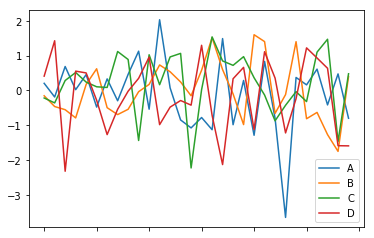

In [9]:
%matplotlib inline
a=11,
print(20)
df = λ.pandas.util.testing.makeDataFrame()()
λ.ipywidgets.Button()()
df.plot()

# Use some string shortcuts.

Let's use some [String Node Transformer](2018-06-19-String-Node-Transformer.ipynb) tricks from before.

In [10]:
    __import__('__String_Node_Transformer').load_ipython_extension(ip)

The string transformers provide short hand syntax for graphviz and doctests.

In [ ]:
%%everything
"digraph {A->B}"
""">>> assert 10"""

Accordion(children=(Tab(children=(HTML(value='<div><pre>&quot;digraph {A-&gt;B}&quot;\n</pre></div>'), HTML(va…

# Thoughts

* Widgets need to work inside of the outputs.
* These outputs need to link to references in narratives.
* I want to interact with the outputs & I want them to do more... I don't know what it is.
* It's a huge bummer when an interaction doesn't work as expected.
* The widget view is more playful than the static view.